## Observations and Insights 

In [ ]:
#Three Observations:
#1.) It is apparent that not all mice survived the study as their time points differ
#2.) It appears as though the Tumor Volume increased with the use of Infubinol
#3.) It apearts as though the Tumor Volume decreased with the use of Ramicane

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
study_results.sort_values(["Mouse ID", "Timepoint"]).head(15)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
113,a203,0,45.000000,0
389,a203,5,48.508468,0
598,a203,10,51.852437,1
758,a203,15,52.777870,1
1018,a203,20,55.173336,1
1295,a203,25,56.793208,1
1315,a203,30,59.523197,1
1577,a203,35,61.931650,2
1675,a203,40,63.593490,2
1804,a203,45,67.973419,2


In [3]:
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
combined_data_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupe_time = combined_data_df.groupby(["Mouse ID", "Timepoint"])["Sex"].count()
dupe_time[dupe_time >1]


Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Sex, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#dupes = combined_data_df[combined_data_df.duplicated("Mouse ID")]
#dupes

combined_data_df[combined_data_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df[combined_data_df["Mouse ID"] !="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1880

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_stat = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_stat = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_stat = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_stat = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_stat = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stats_df = pd.concat([mean_stat, med_stat, var_stat, std_stat, sem_stat], axis=1)
stats_df.columns = ["mean", "median", "var", "std", "sem"]
stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Mouse ID per Drug Regimen')

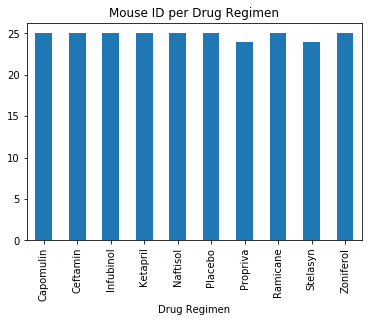

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_per_drug = clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mouse_per_drug.plot.bar()
plt.title("Mouse ID per Drug Regimen")

Text(0.5, 1.0, 'Mouse ID per Drug Regimen')

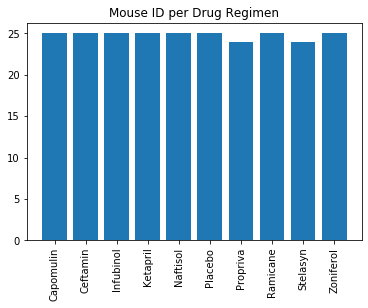

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(mouse_per_drug.index, mouse_per_drug)
plt.xticks(rotation=90)
plt.title("Mouse ID per Drug Regimen")

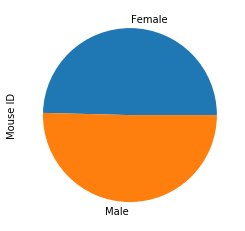

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#mouse_per_drug = clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
#mouse_per_drug.plot.bar()
#plt.title("Mouse ID per Drug Regimen")

male_v_female = clean_df.groupby("Sex")["Mouse ID"].nunique()
male_v_female.plot.pie()

Text(0, 0.5, 'Mouse ID')

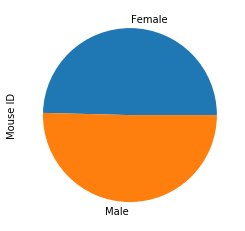

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(male_v_female, labels=["Female", "Male"])
plt.ylabel(male_v_female.name)

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_4drugs = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].sort_values(["Mouse ID", "Timepoint"])
final_tumor_vol = df_4drugs.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
final_tumor_vol.name ="final_tumor_vol"
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_4drugs = df_4drugs.merge(final_tumor_vol, left_on="Mouse ID", right_index=True)
df_4drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,final_tumor_vol
454,a203,Infubinol,Female,20,23,0,45.000000,0,67.973419
455,a203,Infubinol,Female,20,23,5,48.508468,0,67.973419
456,a203,Infubinol,Female,20,23,10,51.852437,1,67.973419
457,a203,Infubinol,Female,20,23,15,52.777870,1,67.973419
458,a203,Infubinol,Female,20,23,20,55.173336,1,67.973419
...,...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
1869,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
1870,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
1871,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
df_4drugs_final = df_4drugs.drop_duplicates(subset=["Mouse ID"]).copy()
df_4drugs_final["is_outlier"]=False

for drug in drugs:
    print(drug)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes And Calulate IQR
   
    lower_bound = (df_4drugs_final[df_4drugs_final["Drug Regimen"]==drug].final_tumor_vol.quantile(0.25))
    upper_bound = (df_4drugs_final[df_4drugs_final["Drug Regimen"]==drug].final_tumor_vol.quantile(0.75))
    IQR_size = upper_bound - lower_bound
    outlier = IQR_size *1.5
    
     # Determine outliers using upper and lower bounds
    df_4drugs_final.loc[(df_4drugs_final["final_tumor_vol"] <(lower_bound - outlier)) |(df_4drugs_final["final_tumor_vol"] > (upper_bound + outlier)), "is_outlier"]=True

df_4drugs_final
      


    

Capomulin
Ramicane
Infubinol
Ceftamin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,final_tumor_vol,is_outlier
454,a203,Infubinol,Female,20,23,0,45.0,0,67.973419,True
464,a251,Infubinol,Female,21,25,0,45.0,0,65.525743,True
484,a275,Ceftamin,Female,20,28,0,45.0,0,62.999356,True
318,a411,Ramicane,Male,3,22,0,45.0,0,38.407618,False
421,a444,Ramicane,Female,10,25,0,45.0,0,43.047543,False
...,...,...,...,...,...,...,...,...,...,...
1836,y769,Ceftamin,Female,6,27,0,45.0,0,68.594745,True
115,y793,Capomulin,Male,17,17,0,45.0,0,31.896238,True
1846,y865,Ceftamin,Male,23,26,0,45.0,0,64.729837,True
75,z578,Ramicane,Male,11,16,0,45.0,0,30.638696,True


In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

   


## Line and Scatter Plots

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen





## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
